# Feedforward Neural Network (FNN)

First, let's convert the crazy data format into the csv format that we are used to dealing with.

## Single Layer Perceptron (No hidden layer)

In [8]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [l.read(1)]
        for j in range(28*28):
            image.append(f.read(1))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

convert("asset/gz/train-images-idx3-ubyte.gz", "asset/gz/train-labels-idx1-ubyte.gz","asset/csv/mnist_train.csv", 60000)
convert("asset/gz/t10k-images-idx3-ubyte.gz", "asset/gz/t10k-labels-idx1-ubyte.gz","asset/csv/mnist_test.csv", 10000)

KeyboardInterrupt: 

In [ ]:
f = open("asset/gz/train-images-idx3-ubyte.gz", "rb")
f.read(16)
print(f.read(16))

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

#df = pd.read_csv("asset/csv/mnist_train.csv", sep=",")
df = pd.read_csv("http://repo.aiquanta.cloud/aiquanta/app/academic/machinelearning/introduction/appendix/asset/csv/latest/feedforward-neural-network-example-1.csv", sep=",")

print(df)

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
5          2    0    0    0    0    0    0    0    0    0  ...      0      0   
6          1    0    0    0    0    0    0    0    0    0  ...      0      0   
7          3    0    0    0    0    0    0    0    0    0  ...      0      0   
8          1    0    0    0    0    0    0    0    0    0  ...      0      0   
9          4    0    0    0    0    0    0    0    0    0  ...      0      0   
10         3    0    0    0    0    0    0    0    0    0  ...      0      0   
11         5    0    0    0    0    0   

In [6]:
X = df.drop(columns = 'label')
y = df['label']

NameError: name 'df' is not defined

A perceptron in this case is simply a feed-forward neural network with no hidden layers. This is equivalent to a multivariate logistic regression, or a Softmax regression.

In [ ]:
def computecost(theta,X,y,alpha):
    m = X.shape[0] #First we get the number of training examples
    y_mat = oneHotIt(y) #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(X,theta) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    cost = (-1 / m) * np.sum(y_mat * np.log(prob)) + (alpha/2)*np.sum(theta*theta) #We then find the loss of the probabilities
    grad = (-1 / m) * np.dot(X.T,(y_mat - prob)) + alpha*theta #And compute the gradient for that loss
    return cost,grad

In [ ]:
def oneHotIt(Y):
    m = Y.shape[0]
    #Y = Y[:,0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

In [34]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [35]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,theta))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [36]:
theta = np.zeros([X.shape[1],len(np.unique(y))])
iterations = 1000
learningRate = 1e-5
losses = []

def gradient_descent(X,y,theta,alpha=0.01,iterations=100):
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost,grad = computecost(theta,X,y,alpha)
        theta = theta - (learningRate * grad)
        cost_history[it]  = cost
        
    return theta, cost_history

In [37]:
theta,cost_history = gradient_descent(X,y,theta,learningRate,iterations)

Text(0.5,1,'Cost function using Gradient Descent with Regularization')

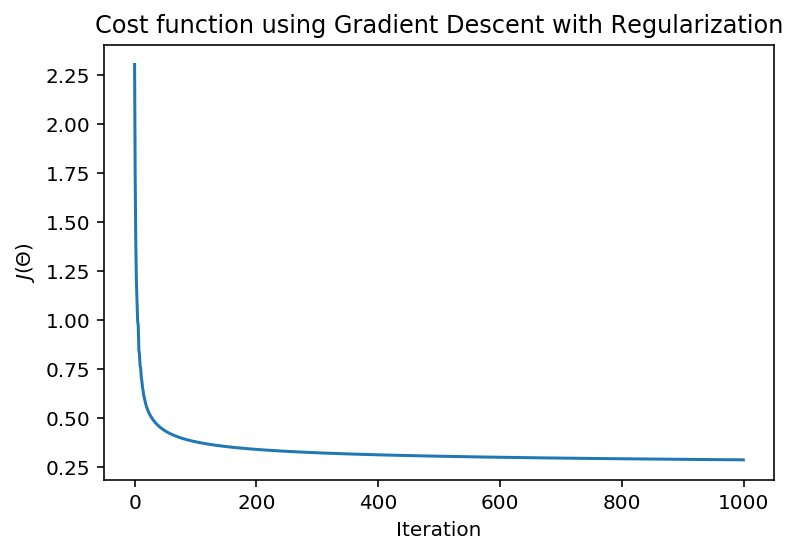

In [38]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
#plt.yscale("log")
plt.title("Cost function using Gradient Descent")

In [41]:
print(theta)

[[0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 ...

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]

 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
np.savetxt("theta.csv", theta, delimiter=",")

### Testing the fit

In [44]:
import pandas as pd
import numpy as np
import scipy.sparse
from pandas import DataFrame

#df = pd.read_csv("asset/csv/mnist_test.csv", sep=",")
df = pd.read_csv("http://repo.aiquanta.cloud/aiquanta/app/academic/machinelearning/introduction/appendix/asset/csv/latest/feedforward-neural-network-example-2.csv", sep=",")


      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \

0         7    0    0    0    0    0    0    0    0    0  ...      0      0   

1         2    0    0    0    0    0    0    0    0    0  ...      0      0   

2         1    0    0    0    0    0    0    0    0    0  ...      0      0   

3         0    0    0    0    0    0    0    0    0    0  ...      0      0   

4         4    0    0    0    0    0    0    0    0    0  ...      0      0   

5         1    0    0    0    0    0    0    0    0    0  ...      0      0   

6         4    0    0    0    0    0    0    0    0    0  ...      0      0   

7         9    0    0    0    0    0    0    0    0    0  ...      0      0   

8         5    0    0    0    0    0    0    0    0    0  ...      0      0   

9         9    0    0    0    0    0    0    0    0    0  ...      0      0   

10        0    0    0    0    0    0    0    0    0    0  ...      0      0   

11        6    0    0    0    0    0    

In [45]:
X = df.drop(columns = 'label')
y = df['label']

In [46]:
prob,pred=getProbsAndPreds(X)

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,pred)

In [51]:
print('The accuracy of this model is:', 100*accuracy,'%')

The accuracy of this model is: 92.08 %


## Single Hidden Layer (Multiple Layer Perceptron)

Here, we will use the torch package to make our single hidden layer neural network.

In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [11]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

Now we make the dataset iterable.

In [12]:
batch_size = 60000
n_iters = 1000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Then we define what kind of neural network we want to set up. Here it is a feedforward neural network.

Here, we will use a Rectified Linear Unit activation because it provides faster convergence than sigmoid or tanh activation.

In [13]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out

Our images are 28x28 pixels, so our input dimensions is 784 dimensions. We will have a hidden layer of 100 hidden neurons. And our output will be 10, because there are 0-9 digits 

In [14]:
input_dim = 28*28
hidden_dim = 200
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

We also enable the use of CUDA cores if any exist.

In [15]:
model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

FeedforwardNeuralNetModel(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)

We will use cross entropy loss because this is the most appropriate loss function for logistic/softmax regression.

In [16]:
criterion = nn.CrossEntropyLoss()

We will use the SGD optimizer defined within the torch package.

In [17]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 1 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Making use of the GPU
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 1. Loss: 2.338165521621704. Accuracy: 10.47
Iteration: 2. Loss: 2.309584379196167. Accuracy: 10.36
Iteration: 3. Loss: 2.300764322280884. Accuracy: 10.23
Iteration: 4. Loss: 2.296325445175171. Accuracy: 11.53
Iteration: 5. Loss: 2.2929158210754395. Accuracy: 11.46
Iteration: 6. Loss: 2.2897493839263916. Accuracy: 11.52
Iteration: 7. Loss: 2.286651849746704. Accuracy: 11.64
Iteration: 8. Loss: 2.2835803031921387. Accuracy: 11.99
Iteration: 9. Loss: 2.2805018424987793. Accuracy: 12.72
Iteration: 10. Loss: 2.2774078845977783. Accuracy: 13.55
Iteration: 11. Loss: 2.2743265628814697. Accuracy: 14.64
Iteration: 12. Loss: 2.2712197303771973. Accuracy: 16.05
Iteration: 13. Loss: 2.268130302429199. Accuracy: 17.34
Iteration: 14. Loss: 2.265024185180664. Accuracy: 18.82
Iteration: 15. Loss: 2.2619142532348633. Accuracy: 20.31
Iteration: 16. Loss: 2.258772373199463. Accuracy: 22.1
Iteration: 17. Loss: 2.255624532699585. Accuracy: 24.08
Iteration: 18. Loss: 2.252479076385498. Accuracy: 

Below is a  plot of Accuracy vs Iteration. It shows that accuracy asymptotically approaches 100%

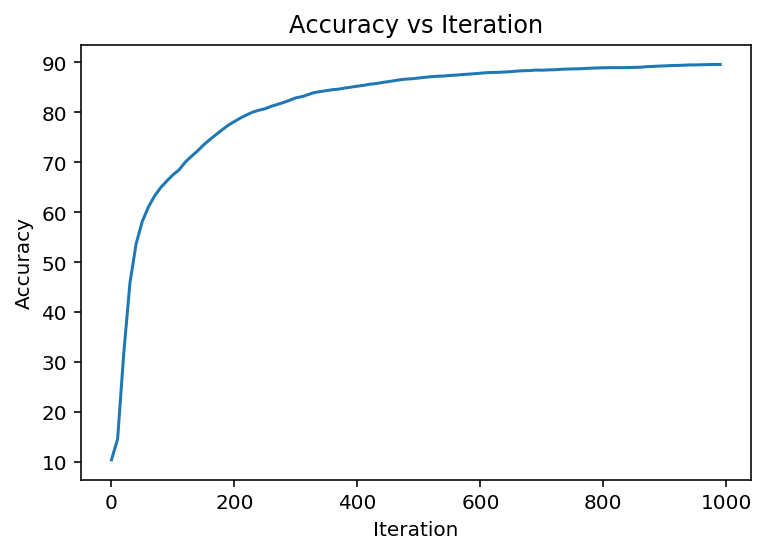

In [19]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 1000, 10)
ynew=s(xnew)
#plt.figure()
plt.plot(xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()
#plt.plot(accuracy_history)
#plt.xlabel("Iteration")
#plt.ylabel("Accuracy")
#plt.title("Accuracy vs Iteration")

As you can see, the accuracy is even worse compared to a single-layer perceptron. We will use a different method by splitting the dataset into batches, and iterating through the dataset. 

In [28]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 100000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 500
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Linear function  # LINEAR
        out = self.fc1(x)
        # Non-linearity  # NON-LINEAR
        out = self.sigmoid(out)
        # Linear function (readout)  # LINEAR
        out = self.fc2(out)
        return out



model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 100. Loss: 1.782270908355713. Accuracy: 71.14
Iteration: 200. Loss: 1.0886179208755493. Accuracy: 76.32
Iteration: 300. Loss: 0.8141894936561584. Accuracy: 83.59
Iteration: 400. Loss: 0.6273528337478638. Accuracy: 84.41
Iteration: 500. Loss: 0.5135177373886108. Accuracy: 86.83
Iteration: 600. Loss: 0.4611075818538666. Accuracy: 87.78
Iteration: 700. Loss: 0.4468379616737366. Accuracy: 88.5
Iteration: 800. Loss: 0.409314900636673. Accuracy: 88.89
Iteration: 900. Loss: 0.43328893184661865. Accuracy: 89.46
Iteration: 1000. Loss: 0.4113520681858063. Accuracy: 89.63


KeyboardInterrupt: 

In [36]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 100000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


input_dim = 28*28
hidden_dim = 512
output_dim = 10

class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self):
        super().__init__()
        input_dim = 28*28
        # Linear function
        self.fc1 = nn.Linear(input_dim, 512)
        # Non-linearity
        self.sigmoid = nn.Sigmoid()
        # Linear function (readout)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x



model = FeedforwardNeuralNetModel()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.02

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




epochs = 3
train_losses = []
test_losses = []
min_loss = np.Inf

for i in range(epochs):
    train_loss = 0
    train_acc = 0 
    test_loss = 0 
    test_acc = 0 
    
    # Training step
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(top_class.shape)
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        
    # Validation Step
    with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
            log_ps = model.forward(images)
            test_loss += criterion(log_ps, labels).item()
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            test_acc += torch.mean(equals.type(torch.FloatTensor)).item()
    
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch:",i+1,
          "Train loss:",train_loss/len(trainloader),
          "TrainAcc:",100*train_acc/len(trainloader),
          "Test loss:",test_loss/len(testloader),
          "Test Acc:",100*test_acc/len(testloader))

Epoch: 1 Train loss: 2.0453752422332765 TrainAcc: 55.95666670054197 Test loss: 1.7226263635298784 Test Acc: 74.20588240903966
Epoch: 2 Train loss: 1.4064793968200684 TrainAcc: 76.11500006914139 Test loss: 1.0917571783065796 Test Acc: 80.94117641448975
Epoch: 3 Train loss: 0.9453862655162811 TrainAcc: 81.00999999046326 Test loss: 0.7801527065389297 Test Acc: 84.10294126061832


In [37]:
model.fc1.weight.data

tensor([[ 0.0182, -0.0149,  0.0299,  ...,  0.0305, -0.0196,  0.0040],
        [ 0.0181, -0.0246,  0.0166,  ..., -0.0083,  0.0289, -0.0042],
        [ 0.0113, -0.0019, -0.0314,  ...,  0.0054, -0.0154, -0.0269],
        ...,
        [ 0.0232, -0.0185, -0.0225,  ...,  0.0304, -0.0357,  0.0184],
        [ 0.0283,  0.0058,  0.0068,  ...,  0.0004,  0.0081, -0.0082],
        [-0.0040, -0.0090, -0.0111,  ...,  0.0033,  0.0110, -0.0300]])

In [38]:
model.fc2.weight.data

tensor([[ 6.0315e-02,  2.8423e-05, -1.1003e-02,  ..., -2.5362e-02,
         -3.5837e-02,  1.6655e-02],
        [-2.7726e-02,  7.0192e-02, -3.4338e-02,  ..., -5.4595e-02,
         -8.5888e-02,  5.2758e-02],
        [ 1.9979e-02, -3.1863e-02,  1.4726e-02,  ..., -2.2888e-02,
          5.5293e-02, -1.1967e-03],
        ...,
        [ 7.7341e-02, -6.4827e-03,  1.0661e-01,  ...,  4.0478e-03,
         -2.1527e-02,  3.3649e-03],
        [ 1.9176e-04, -3.4062e-02,  2.9450e-02,  ...,  3.3044e-02,
          6.4878e-03, -9.1006e-03],
        [ 1.9513e-02, -9.2026e-03, -3.1180e-02,  ...,  6.2060e-02,
          9.3320e-03, -4.1859e-02]])

print("The state dict keys: \n\n", model.state_dict().keys())

checkpoint = {'model': FeedforwardNeuralNetModel(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, './asset/model/FNN1.pth')

# Start Here To Train

In [ ]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

In [44]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = True
    
    model.eval()
    
    return model

In [45]:
model = load_checkpoint('./asset/model/FNN1.pth')
print(model)

FeedforwardNeuralNetModel(

  (fc1): Linear(in_features=784, out_features=512, bias=True)

  (sigmoid): Sigmoid()

  (fc2): Linear(in_features=512, out_features=10, bias=True)

  (dropout): Dropout(p=0.2)

)


In [46]:
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


batch_size = 600
n_iters = 100000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

trainloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

testloader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


model = model

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.02

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)




epochs = 3
train_losses = []
test_losses = []
min_loss = np.Inf

for i in range(epochs):
    train_loss = 0
    train_acc = 0 
    test_loss = 0 
    test_acc = 0 
    
    # Training step
    model.train()
    for images, labels in trainloader:
        optimizer.zero_grad()
        log_ps = model.forward(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == labels.view(top_class.shape)
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        
    # Validation Step
    with torch.no_grad():
        model.eval()
        
        for images, labels in testloader:
            log_ps = model.forward(images)
            test_loss += criterion(log_ps, labels).item()
            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(top_class.shape)
            test_acc += torch.mean(equals.type(torch.FloatTensor)).item()
    
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch:",i+1,
          "Train loss:",train_loss/len(trainloader),
          "TrainAcc:",100*train_acc/len(trainloader),
          "Test loss:",test_loss/len(testloader),
          "Test Acc:",100*test_acc/len(testloader))

Epoch: 1 Train loss: 0.7317008990049362 TrainAcc: 83.5266661643982 Test loss: 0.6320816751788644 Test Acc: 86.00490128292756
Epoch: 2 Train loss: 0.6199018162488937 TrainAcc: 84.91333371400833 Test loss: 0.5482035787666545 Test Acc: 87.05882359953488
Epoch: 3 Train loss: 0.5525807091593742 TrainAcc: 86.06500047445297 Test loss: 0.4942203129039091 Test Acc: 87.91666697053348


Here we split the entire dataset into 100 pieces, and give the iteration 100 times as much. The results are much improved, with the accuracy reaching 97.8%

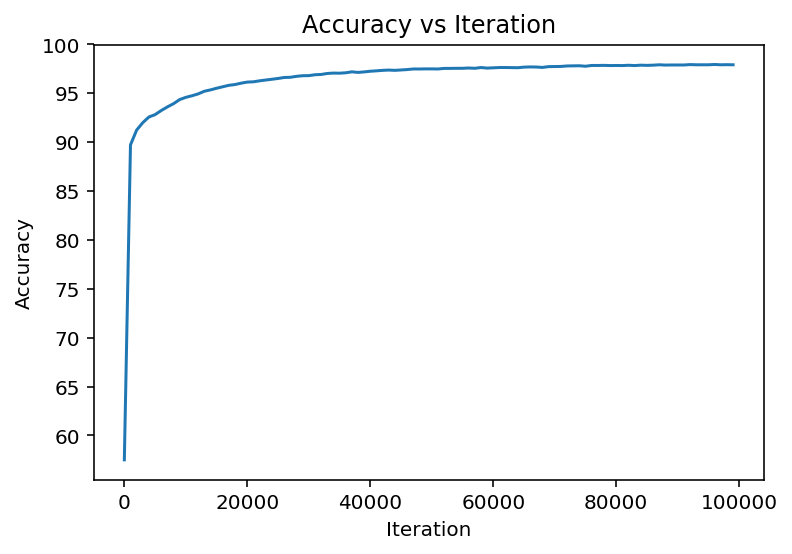

In [21]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 1000, 10)
ynew=s(xnew)

plt.plot(100*xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()

## 3 Hidden Layers

Now we turn our attention to the case of a FNN with 3 hidden layers. The gross format of the code is quite similar to the one with 1 hidden layer, except in the model class, the 2 extra layers are stated. Note, the same batch processing method is used.

In [46]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

batch_size = 600
n_iters = 100000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.ReLU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iter = 0
accuracy_history = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images with gradient accumulation capabilities
        images = images.view(-1, 28*28).requires_grad_()

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Calculate Accuracy
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:

                images = images.view(-1, 28 * 28).requires_grad_().to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100. * correct.item() / total
            accuracy_history.append(accuracy)
            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))




Iteration: 100. Loss: 2.290078639984131. Accuracy: 22.04
Iteration: 200. Loss: 2.2700140476226807. Accuracy: 32.0
Iteration: 300. Loss: 2.2269670963287354. Accuracy: 50.99
Iteration: 400. Loss: 2.125633716583252. Accuracy: 62.31
Iteration: 500. Loss: 1.739134669303894. Accuracy: 70.26
Iteration: 600. Loss: 1.1496527194976807. Accuracy: 75.17
Iteration: 700. Loss: 0.856004536151886. Accuracy: 79.91
Iteration: 800. Loss: 0.638582170009613. Accuracy: 83.3
Iteration: 900. Loss: 0.5667603611946106. Accuracy: 85.33
Iteration: 1000. Loss: 0.6014547348022461. Accuracy: 86.12
Iteration: 1100. Loss: 0.4775332510471344. Accuracy: 87.24
Iteration: 1200. Loss: 0.4150247871875763. Accuracy: 87.75
Iteration: 1300. Loss: 0.36752328276634216. Accuracy: 88.21
Iteration: 1400. Loss: 0.4652986228466034. Accuracy: 88.8
Iteration: 1500. Loss: 0.3517378866672516. Accuracy: 89.08
Iteration: 1600. Loss: 0.325283944606781. Accuracy: 89.56
Iteration: 1700. Loss: 0.3077986538410187. Accuracy: 89.75
Iteration: 180

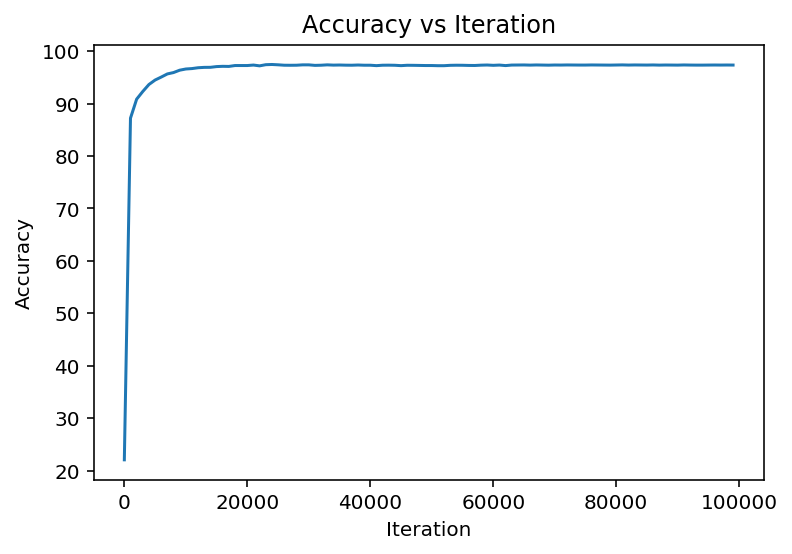

In [47]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
s = interpolate.InterpolatedUnivariateSpline(range(len(accuracy_history)), accuracy_history)
xnew = np.arange(0, 1000, 10)
ynew=s(xnew)

plt.plot(100*xnew, ynew)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Iteration')
plt.show()

As can be seen, the accuracy increases stagnates at a certain level, to solve that problem, a different solution can be sought.